In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1.a

In [2]:
def perceptronAlgo(w0, X, Y, learnRate = 1):      # X -> Set of features, Y -> Set of class
    w = w_n = w0
    t = 0
    c = 50                          #If there is no mistake for 50 consecutive values of (x,y), we will consider w is converged 
    while True:
        i = np.random.randint(len(X))
        x_n, y_n = X[i], Y[i]
        if y_n * (w).dot(x_n) < 0:
            w_n = w + y_n*x_n*learnRate
            t += 1
            c = 50
        if (w_n == w).all():
            if c:
                c -= 1
            else:
                break
        else:
            w = w_n
    return w

## Q1.b

In [3]:
def splitData(data):
    train = data[:int(len(data)*0.6)]
    test = data[int(len(data)*0.6):]
    return train, test

In [4]:
data = np.loadtxt("data_banknote_authentication.txt", delimiter = ',')
data = np.unique(data,axis=0)                       #To remove duplication
data[data == 0] = -1
np.random.shuffle(data)
train_set, test_set = splitData(data)               #To split the data into train and test set

In [5]:
#Funtion a w thats fits the given (X,Y)
def get_w(X, Y):
    w0 = np.array([1 for i in range(len(X[0]))])
    w = perceptronAlgo(w0, X, Y)
    return w

In [6]:
#Predicts loss or no loss
def predict(w, x, y):
    if y * (w.T).dot(x) >= 0:
        return 0                    #No loss
    else:
        return 1                    #Loss

# Q1.c 

K-Fold Cross Validation

In [7]:
def crossValidation(data):
    fold = 5
    leng = len(data)//fold
    error = np.inf
    w_final = []
    for f in range(1, fold+1):
        l = (f-1) * leng
        if f == fold:
            r = len(data)
        else:
            r = f * leng
        test = data[l: r]                              #validation set
        train = np.concatenate([data[:l], data[r:]])   #training set
        X_train = []
        X_train = np.array([np.append(X_train,train[i][0:-1]) for i in range(len(train))])
        Y_train = []
        Y_train = np.array([np.append(Y_train,train[i][-1]) for i in range(len(train))])
        w = get_w(X_train, Y_train)
        
        X_test = []
        X_test = np.array([np.append(X_test,test[i][0:-1]) for i in range(len(test))])
        Y_test = []
        Y_test = np.array([np.append(Y_test,test[i][-1]) for i in range(len(test))])
        e = 0
        for i in range(len(test)):
            if predict(w, X_test[i], Y_test[i]):
                e += 1
        e = e/len(test) * 100
        if e < error:
            error = e
            w_final = w
    print("Cross validation test set error = ", error)
    return w_final

In [8]:
w = crossValidation(train_set)

Cross validation test set error =  3.7267080745341614


# Q1.e

In [9]:
#Function to calculate F1 score
def calF1score(data, w):
    X = []
    X = np.array([np.append(X,data[i][0:-1]) for i in range(len(data))])
    Y = []
    Y = np.array([np.append(Y,data[i][-1]) for i in range(len(data))])
    t_p = t_n = f_p = f_n = 0
    error = 0
    for i in range(len(data)):
        if predict(w, X[i], Y[i]):
            error += 1
            if Y[i] == 1:
                f_n += 1
            else:
                f_p += 1
        else:
            if Y[i] == 1:
                t_p += 1
            else:
                t_n += 1
    return t_p / (t_p + 0.5*(f_p+f_n))

In [10]:
calF1score(test_set, w)

0.9398663697104677

## Q2.a

In [11]:
#Creating data
np.random.seed(0)
mean = 10
sd = 5
data = sd * np.random.randn(50) + mean
mean_prior = 25
sd_prior = 5

Normal Distribution Function;  
$ N(x|\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{1}{2}\left ( \frac{x - \mu}{\sigma} \right )^{2}} $

In [12]:
def normalDF(x, mean, sd):
    var = sd**2
    den = ((2*np.pi)**0.5)*sd
    return den**(-1) * np.exp(- (1/2)*((x - mean)/sd)**2)

$ p(D|\mu,\sigma) = \prod_{i=1}^nN(x_i|\mu,\sigma) = (2\pi\sigma^2)^{-\frac{n}{2}}e^{-\frac{1}{2\sigma^2\sum_{i=1}^n\left ( x_i - \mu \right )^2}} $  
  
which can be reduced to;  
$ p(D|\mu,\sigma) = N(\bar{x}|\mu,\frac{\sigma}{\sqrt{n}})$  
  
where, $\bar(x)$ = mean of the current data  
n = number of data points

In [13]:
def likelihood(X, mean, sd):
    x_mean = 0
    for i in X:
        x_mean += i
    x_mean = x_mean/len(X)
    return normalDF(x_mean, mean, sd/(len(X)**0.5))

In [14]:
def prior(mean, mean_prior, sd_prior):
    return normalDF(mean, mean_prior, sd_prior)

In [15]:
def bayesianPosteriorProbability(X, mean, sd, mean_prior, sd_prior):
    n = len(X)
    x_mean = 0
    for i in X:
        x_mean += i
    x_mean = x_mean/len(X)
    new_sd = ((1/sd_prior**2) + (n/sd**2))**-0.5
    new_mean = (new_sd**2)*(mean_prior/sd_prior**2 + (x_mean*n)/sd**2)
    return new_mean, new_sd

In [16]:
mean_pos, sd_pos = bayesianPosteriorProbability(data, mean, sd, mean_prior, sd_prior)
print("Posterior Mean: ", mean_pos,"  Posterior Standard deviation: ", sd_pos)

Posterior Mean:  10.983133687809302   Posterior Standard deviation:  0.7001400420140049


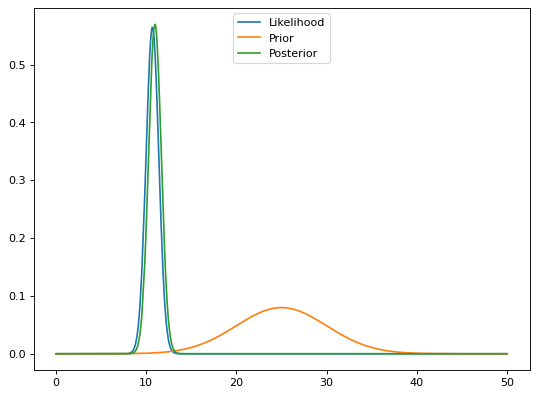

In [17]:
l = mean_prior - 5*sd_prior
r = mean_prior + 5*sd_prior
X = np.random.uniform(l,r,1000)
X.sort()
n = len(data)
d_mean = 0
for i in data:
    d_mean += i
d_mean = d_mean/n
Y_prior = [normalDF(i,mean_prior,sd_prior) for i in X]
Y_likelihood = [normalDF(d_mean,i,sd/n**0.5) for i in X]
Y_posterior = [normalDF(i,mean_pos,sd_pos) for i in X]
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(X,Y_likelihood, label = "Likelihood")
plt.plot(X,Y_prior, label = "Prior")
plt.plot(X,Y_posterior, label = "Posterior")
leg = plt.legend(loc='upper center')

2.b

In [18]:
# Metropolis  algorithm
np.random.seed(0)
mu = np.random.randn()
sd = 100
for i in range(10000):
    mu_new = sd * np.random.randn() + mu
    num = prior(mu_new, mean_prior, sd_prior) * likelihood(X, mu_new, sd)
    den = prior(mu, mean_prior, sd_prior) * likelihood(X, mu, sd)
    r = num/den
    a = np.random.uniform(0,1)
    if r > a:
        mu = mu_new